# Support Vector Machines (SVM) 

Support vector machines (SVMs) are a type of machine learning algorithm that can be used to classify data points into two groups. SVMs work by finding a hyperplane that separates the data points of the two groups with the maximum margin. The margin is the distance between the hyperplane and the closest data points of each group.

In [15]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Support Vector Classification (SVC)

Support vector classification (SVC) is a type of supervised machine learning algorithm that can be used to classify data points into two groups. It is a specific case of support vector machines (SVMs), which are a more general type of machine learning algorithm that can be used for both classification and regression tasks.

In [7]:
x = np.linspace(0, 4, 11)
y = [0]*6 + [1]*5
X, Y = np.mgrid[0:4:200j, 0:4:200j]
Y

array([[0.        , 0.0201005 , 0.04020101, ..., 3.95979899, 3.9798995 ,
        4.        ],
       [0.        , 0.0201005 , 0.04020101, ..., 3.95979899, 3.9798995 ,
        4.        ],
       [0.        , 0.0201005 , 0.04020101, ..., 3.95979899, 3.9798995 ,
        4.        ],
       ...,
       [0.        , 0.0201005 , 0.04020101, ..., 3.95979899, 3.9798995 ,
        4.        ],
       [0.        , 0.0201005 , 0.04020101, ..., 3.95979899, 3.9798995 ,
        4.        ],
       [0.        , 0.0201005 , 0.04020101, ..., 3.95979899, 3.9798995 ,
        4.        ]])

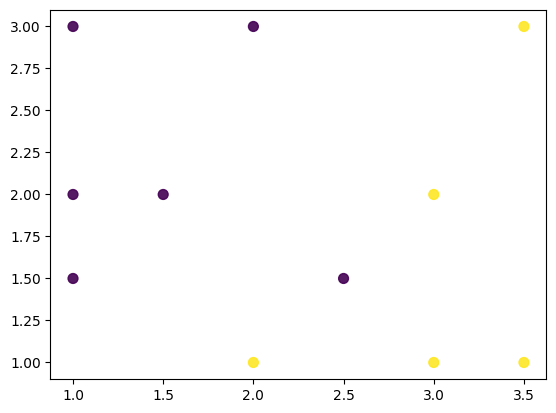

In [5]:
x = np.array([[1,3], [1, 2], [1, 1.5], [1.5, 2], [2, 3], [2.5, 1.5], [2, 1], [3, 1], [3, 2], [3.5, 1], [3.5, 3]])
y = [0]*6 + [1]*5
plt.scatter(x[:,0], x[:,1], c=y, s=50, alpha=0.9)


C:\Users\adity\AppData\Local\Temp\ipykernel_3836\1930746201.py:6: UserWarning: The following kwargs were not used by contour: 'linestyle'
  plt.contour(X, Y, Z, colors=['k'], linestyle=['-'], levels=[0]) # This creates contour lines using the X and Y co-ord and the decision function and the line is drawn at the decision boundary (level 0)


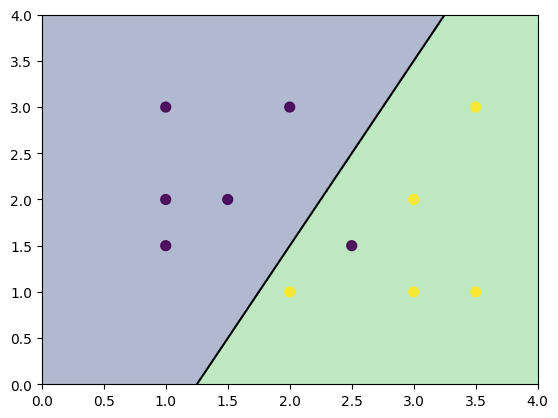

In [6]:
svc = svm.SVC(kernel='linear').fit(x, y) # This line creates an SVM classifier object with a linear kernel and fits it to the input data x and corresponding labels y. The classifier is trained ot learn the decision boundaries between different classes in the data
X, Y = np.mgrid[0:4:200j, 0:4:200j] # This is generating a grid of  200 values in X and Y in range (0, 4) With strictly increasing values
Z = svc.decision_function(np.c_[X.ravel(), Y.ravel()]) # This uses the trained SVM classifier to calculate the decision function for each point in the grid.
Z = Z.reshape(X.shape)
plt.contourf(X, Y, Z > 0, alpha=0.4) # This line creates a filled contour plot using the X and Y co-ordinates and the decision function values. The Z > 0 condition is used to determine the regions above and below the decision boundary. 
plt.contour(X, Y, Z, colors=['k'], linestyle=['-'], levels=[0]) # This creates contour lines using the X and Y co-ord and the decision function and the line is drawn at the decision boundary (level 0)
plt.scatter(x[:,0], x[:,1], c=y, s=50, alpha=0.9)
plt.show()


In [8]:
# Predicting values
# 0 is for class in blue and 1 is for class in red 
svc.predict([[1.5, 2.5]]) 


array([0])

# Cupcakes VS Muffin

In [13]:
data = pd.read_csv("Cupcakes vs Muffins.csv")
type_label = np.where(data['Type'] == 'Muffin', 0, 1)
data

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [18]:
data_features = data.columns.values[1:].tolist()
ingredients = data[['Flour', 'Sugar']].values
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)
pre = model.predict([[40, 20]])
accuracy_score(data, pre)



ValueError: Found input variables with inconsistent numbers of samples: [20, 1]